<img src='https://weclouddata.com/wp-content/uploads/2016/11/logo.png' width='30%'>
-------------

<h3 align='center'> Applied Machine Learning Course - Lab Week 2 Solutions</h3>
<h1 align='center'> Logistic Regression </h1>

<br>
<center align="left"> Developed by:</center>
<center align="left"> WeCloudData Academy </center>


### Load The Dataset

In this exercise, we will be using the wine dataset to demonstrate properties of Logistic Regression.

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. 

The attributes are:
1. Alcohol 
2. Malic acid 
3. Ash 
4. Alcalinity of ash 
5. Magnesium 
6. Total phenols 
7. Flavanoids 
8. Nonflavanoid phenols 
9. Proanthocyanins 
10. Color intensity 
11. Hue 
12. OD280/OD315 of diluted wines 
13. Proline 

In a classification context, this is a well posed problem with "well behaved" class structures. A good data set for first testing of a new classifier, but not very challenging.

This is an exceedingly simple domain, but provides you with hands-on practice and understanding of how to build a classifier from scratch. 


In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math

%matplotlib inline
sns.set(style='ticks', palette='Set2')

In [2]:
data = datasets.load_wine() # load the wine dataset

X = data.data
y = data.target
features = data.feature_names
target_names = data.target_names

## $\Omega$ Practice : Explore the dataset

You can take a look at the shape of the data ($X$), the features, and the target names.

1. Print out the shape of the matrix $X$ and the vector $y$. You should expect to see $X.shape[0] == y.shape[0]$
2. Print out the content of `features`. You should be seeing 13 individual features inside of it.
3. Print out the content of `target_names`. How many classes are there?

In [3]:
# TODO: explore the dataset by completing the steps above
print(f'X.shape: {X.shape}')
print(f'y.shape: {y.shape}')
print(f'{len(features)} features: {features}')
print(f'{len(target_names)} unique targets: {target_names}')
# targets are categorical: 
# (0 represents 'class_0', 1 represents 'class_1', and 2 represents 'class_2')

X.shape: (178, 13)
y.shape: (178,)
13 features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
3 unique targets: ['class_0' 'class_1' 'class_2']


# $\Delta$ 1. Visualize class distribution

## Plot alcohol vs. ash

Let us choose two features and visualization the class distribution in our data set.

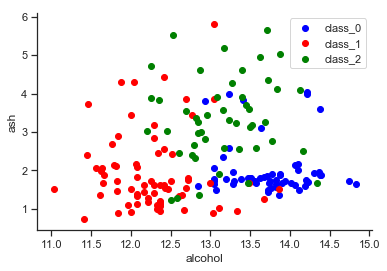

In [4]:
class_0_indices = np.where(y == 0)[0] # all the sample indices with class=`class_0`
class_0 = plt.scatter(X[class_0_indices,0], X[class_0_indices,1], c='b')

class_1_indices = np.where(y == 1)[0] # all the sample indices with class=`class_1`
class_1 = plt.scatter(X[class_1_indices,0], X[class_1_indices,1], c='r')

class_2_indices = np.where(y == 2)[0] # all the sample indices with class=`class_2`
class_2 = plt.scatter(X[class_2_indices,0], X[class_2_indices,1], c='g')

plt.xlabel("alcohol")
plt.ylabel("ash")
plt.legend((class_0, class_1, class_2), ("class_0", "class_1", "class_2"))
sns.despine() # remove the top and right spines from plot(s).

**Question:** Looking at the plot above, do you think the three classes can be well separated if we just use the two features `alcohol` and `ash` for classification?

## Package your visualize function

Let's make our visualization function more flexible. If you find yourself writing the same set of code multiple times, just with some small variable change, it's an indicator that you need to wrap them into one single function which you can call again and again later on.

In [5]:
def visualize_2d(feature_indices, all_feature_names, target_names, X, y):
    series = []
    # target_names=['class_0' 'class_1' 'class_2']
    # targets=[0,1,2]
    # assuming `feature_indices` contain two elements
    idx1 = feature_indices[0]
    idx2 = feature_indices[1]
    colors = ['b', 'r', 'g']
    for i in range(len(target_names)):
        # for each target ("class_0", "class_1", "class_2")
        # we create a scatter plot
        target_indices = np.where(y == i)[0] # find the indices of data where the target == i
        series.append(plt.scatter(X[target_indices, idx1], X[target_indices, idx2], c=colors[i]))
        
    plt.xlabel(all_feature_names[idx1]) # x-axis represents the first feature value
    plt.ylabel(all_feature_names[idx2]) # y-axis represents the second feature value
    plt.legend(series, target_names)
    sns.despine()

The visualization above can now be wrapped as one single function call:

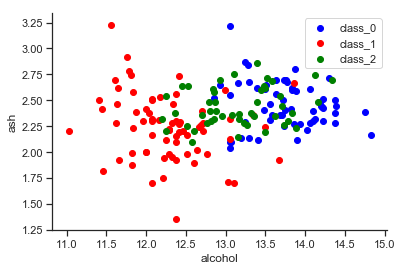

In [6]:
visualize_2d(feature_indices=[features.index('alcohol'),
                              features.index('ash')
                             ], 
             all_feature_names=features,
             target_names=target_names,
             X=X,
             y=y
            )

## $\Omega$ Practice: Visualize class distribution with "color_intensity" and "hue"

Now let's perform a similar visualization as above, but with two different features `color_intensity` and `hue`. 

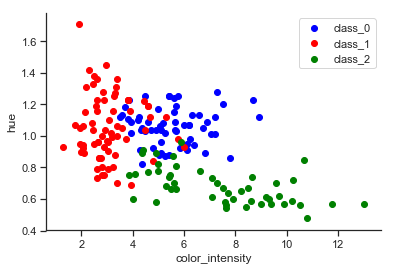

In [7]:
# TODO: visualizae class distribution among the dataset 
# by projecting the data points with two features only, "color_intensity" and "hue"

visualize_2d(feature_indices=[features.index('color_intensity'),
                              features.index('hue')
                             ], 
             all_feature_names=features,
             target_names=target_names,
             X=X,
             y=y
            )

# $\Delta$ 2. Data preparation

Now let's fit a **binary Logistic Regression classifier** on this set of data.

Before doing so, we need to reduce our number of classes from 3 to 2.

> Hint: we will merge the two classes which are linearly separable from the third into one single class.

## Step 1: Merge `class_1` and `class_2` into one class, called `class_1_and_2`

In [8]:
# Hint: 
# 1. find the indices where y != 0 using np.where, and use these indices to reassign y
# 2. modify target_names to reflect the change

class_1_and_2_indices = np.where(y != 0)[0] # all the sample indices with class!=`1`
target_names = ['class_0', 'class_1_and_2']
y[class_1_and_2_indices] = 1

## $\Omega$ (Practice)  Step 2:  Count how many `class_0` and `class_1_and_2` there are in your transformed data

This step is useful for checking whether the dataset you are dealing with is a balanced one or a highly-skewed one. Highly skewed dataset is particularly challenging for classification, as the classifier would tend to ignore minority class when performing optimization, and result in those minority class performing really poorly in general.

In [9]:
class_0_indices = np.where(y == 0)[0]
print(f'class_0: {len(class_0_indices)}')
print(f'class_1_and_2: {len(class_1_and_2_indices)}')

class_0: 59
class_1_and_2: 119


## Step 3: Dimension reduction (a rough one)

Select the two features out of the total 13 and project the dataset onto the two chosen features. Apply this dimension reduction `X_train` and `X_test`.

> We are performing a very rudimentory dimension reduction here, simply by choosing two (random) features out of all possible features and discard the rest. In reality, dimension reduction should be performed in a more disciplined manner, which is a topic in the **Advanced Machine Learning** course.

In [10]:
feature_indices = [2, 6] # or some others as your wish 
X = X[:, np.array(feature_indices)]

## $\Omega$ Step 4:  (Practice) Visualize your new data points with the same visualize_2d function


> Be careful with the `feature_indices` this time, since your `X` is already reduced to 2 dimensions only.


**Question**: Does this new dataset, which contain two classes only, is linearly separable by your chosen features?

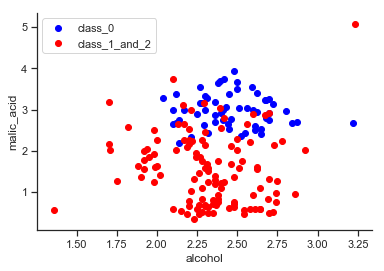

In [11]:
visualize_2d(feature_indices=[0,1], all_feature_names=features, target_names=target_names, X=X, y=y)


## $\Omega$ Step 5:  (Practice) Split the entire dataset to be 80% training and 20% test (validation)

Recall that, in order to evaluate our trained model, we need to always reserve a fraction of our dataset as the validation set, so we can obtain evaluation metrics by comparing the ground-truth labels in this validation set and the predictions generated by our model.

We performed the same splitting in the Lab notebook in Week 1.

Hint: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [12]:
# Split the dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

## $\Omega$ Step 6: (Practice) Verify the size of the two datasets: 
 - `X_train` and `y_train`: the training set
 - `X_test` and `y_test`: the test set

In [13]:
print(f'{len(y_train)} training examples, and {len(y_test)} examples')

142 training examples, and 36 examples


## Step 7: Standardize your training data

As introduced in the Lab notebook of Week 1, in general, it is a good idea to perform certain preprocessing steps, such as feature standardization and normalization, imputation, outlier removal, on your training data.

Here, we perform the same feature standardization as we did in Week 1.

Hint: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_train

array([[ 0.64412971, -1.42846826],
       [-0.39779858, -0.5029981 ],
       [-0.32337513,  0.31964204],
       [ 0.42085937, -1.23309123],
       [ 0.90461179,  0.67954711],
       [ 1.23951731,  1.33765922],
       [-0.54664548,  0.30935904],
       [-1.73742067, -0.60582812],
       [ 0.49528281,  0.062567  ],
       [ 0.71855316,  1.11143318],
       [-0.62106893, -1.32563825],
       [-0.24895168,  0.19624602],
       [-0.62106893, -1.20224223],
       [ 1.31394076,  1.2245462 ],
       [ 0.12316557, -0.74979015],
       [-0.65828065, -1.51073228],
       [-0.21173995,  1.37879123],
       [ 1.23951731, -0.65724313],
       [-0.02568133,  0.95718815],
       [-1.58857377,  0.093416  ],
       [-0.39779858, -1.29478924],
       [-0.80712755, -1.43875127],
       [ 1.12788213,  0.93662215],
       [ 0.79297661, -1.38733626],
       [ 0.04874212, -1.15082722],
       [-0.84433927,  0.24766103],
       [-0.17452823, -0.36931908],
       [-0.4350103 , -1.40790226],
       [-1.43972687,

## $\Omega$ Step 8: Standardize your test data

Now we need to **use the same scaler** to **transform** our test data. 

<font color='#FF0000'>Be careful, don't call `fit_transform` again on the test data!!


In [15]:
X_test = scaler.transform(X_test)
X_test

array([[-0.4350103 ,  0.97775416],
       [ 0.42085937, -0.60582812],
       [-0.76991583,  1.18341419],
       [ 0.34643592,  0.85435814],
       [-0.881551  ,  0.72067911],
       [ 3.21173872,  3.21944855],
       [ 0.90461179,  0.57671709],
       [ 0.04874212, -1.0582802 ],
       [-0.91876272,  0.083133  ],
       [-0.17452823, -0.4618661 ],
       [-0.06289306, -1.49016628],
       [-0.50943375, -1.6546943 ],
       [ 0.30922419,  1.48162125],
       [-0.99318617,  1.85180931],
       [ 1.20230558, -1.14054421],
       [-1.36530342,  0.31964204],
       [ 1.23951731,  0.81322613],
       [ 0.42085937,  2.03690334],
       [-1.29087997, -0.55441311],
       [ 0.86740006,  1.07030117],
       [-2.48165516,  1.26567821],
       [ 0.68134144,  0.49445307],
       [ 1.87211663,  0.76181112],
       [-1.43972687, -0.02998002],
       [-0.32337513, -0.88346917],
       [-0.7327041 ,  0.32992504],
       [-0.2861634 ,  1.2348292 ],
       [-0.21173995, -0.26648906],
       [ 2.05817525,

# $\Delta$ 3. Model fitting

- We will be using Scikit-learn's `LogisticRegression` module to perform our **binary logistic regression** classification. As a challenge, you can try implementing your own **gradient descent optimization** on logistic regression, and we leave the practice in this week's assignment.

- **User guide:** http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

## Step 1: Initialize the model

In [16]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight='balanced')

**Question**: what is this `class_weight` parameter? Why do we want to set it to `balanced`?

**Hint**: read the documentation about the `class_weight` paramter of `LogisticRegression` on http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression and reference to the class distribution issue mentioned in the section **(Practice) Step 2: Count how many class_0 and class_1_and_2 there are in your transformed data**.

## Step 2: Fit the model using `X_train` and `y_train`

When using sklearn models, such as the `LinearRegression` model we used in Week 1 and the `LogisticRegression` model we use here, training a model is as simple as one line code: `model.fit(X, y)`.

The reason behind this simplicity is due to the good software engineering principles implemented in sklearn, such as encapsulation and polymorphism (so it provides a consistent interface to users, regardless of the underlying model).


In [17]:
lr.fit(X_train, y_train)

/Users/jodie/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

## Step 3: Use `lr` to generate the predictions on `X_train`

Normally, we do not need to generate predictions on the training data, as we care about the model's ability to generate predictions on unseen data.

However, here, let's generate predictions on the training data anyway, so we can compare the training performance against the validation performance, to get a sense of whether we are overfitting or underfitting.

In [18]:
y_pred_train = lr.predict(X_train)

## Step 4: Evaluate the model performance on the training set

Looking at training performance is a good way of see if your model is underfitting or not, i.e., if the model cannot even fit the training data almost perfectly, it indicates your model is not expressive enough to explain all the variance in the training data.

In [19]:
from sklearn.metrics import classification_report, accuracy_score

print('Training performance')
print(classification_report(y_pred_train, y_train))
accuracy = accuracy_score(y_pred_train, y_train) *100
print("Classification accuracy: {}%.".format(round(accuracy,2)))

Training performance
              precision    recall  f1-score   support

           0       0.96      0.77      0.85        56
           1       0.87      0.98      0.92        86

   micro avg       0.89      0.89      0.89       142
   macro avg       0.91      0.87      0.88       142
weighted avg       0.90      0.89      0.89       142

Classification accuracy: 89.44%.


## $\Omega$ Step 5: (Practice) Evaluate the model performance on the test set

In [20]:
# TODO: evaluate your model's performance on the test set

print('Testing performance')
y_pred_test = lr.predict(X_test)
print(classification_report(y_pred_test, y_test))
accuracy = accuracy_score(y_pred_test, y_test) *100
print("Classification accuracy: {}%.".format(round(accuracy,2)))

Testing performance
              precision    recall  f1-score   support

           0       1.00      0.70      0.82        20
           1       0.73      1.00      0.84        16

   micro avg       0.83      0.83      0.83        36
   macro avg       0.86      0.85      0.83        36
weighted avg       0.88      0.83      0.83        36

Classification accuracy: 83.33%.


## $\Omega$ (Practice) Manually calculate the test performance metrics using `y_test` and `y_pred_test`

By comparing the ground truth `y_test` with our predictions `y_pred_test`, we can compute the set of metrics we got above: `preicision`, `recall`, `f1-score`, and `accuracy`.

In this exercise, we will achieve this without using sklearn's function. This is to help you establish a solid understanding of how those metrics work.

Verify your calculation by confirming your hand calculated results are the same as the ones we got above.

In [21]:
pos_class = lr.classes_[0]
print(f'positive class: {pos_class}')

pred_pos_idx = list(np.where(y_pred_test == pos_class)[0])
true_pos_idx = list(np.where(y_test == pos_class)[0])

pred_neg_idx = list(np.where(y_pred_test != pos_class)[0])
true_neg_idx = list(np.where(y_test != pos_class)[0])


# Compute TP (true positive)
tp = len(set(pred_pos_idx).intersection(true_pos_idx))
print(tp)

# Compute FP (false positive)
fp = len(set(pred_pos_idx).intersection(true_neg_idx))
print(fp)

# Compute FN (false negative)
fn = len(set(pred_neg_idx).intersection(true_pos_idx))
print(fn)

# Compute TN (true negative)
tn = len(set(pred_neg_idx).intersection(true_neg_idx))
print(tn)

# Compute precision
precision = tp / (tp+fp)
print(precision)

# Compute recall
recall = tp / (tp+fn)
print(recall)

# Compute f1-score
f1_score = 2/(1/precision+1/recall)
print(f1_score)

# Compute accuracy

positive class: 0
14
6
0
16
0.7
1.0
0.8235294117647058


## Step 6: Get prediction probabilities

As mentioned, one of the advantages of using Logistic Regression is the ability to product natural prediction probabilities. By default, when you call `lr.predict()`, it uses **probability $\ge 0.5$ as the threshold** for producing positive predictions, and output the categorical labels directly for you.

Now let's take a look at how these probabilities actually look like. We call the `.predict_prob()` function on a trained LogisticRegression model to get the raw probabilities for each output class.

> <font color='#FF0000'>Note, not all classifiers implement `.predict_prob()`, because not all classifiers have a valid probility interpretation in their output. 

In [22]:
test_probs = lr.predict_proba(X_test) # `predict_prob` is the way to get the predictions in raw probabilities
classes = lr.classes_
pos_idx = list(classes).index(1)  # find the class index representing the positive class `1`

for (i, y) in enumerate(y_test):
    prob = test_probs[i, pos_idx] # get the probability P(C=1|X) for the i-th test sample
    print('true class: %d, predicted prob: %.2f' % (y_test[i], round(prob, 2)))

true class: 0, predicted prob: 0.18
true class: 1, predicted prob: 0.94
true class: 1, predicted prob: 0.12
true class: 0, predicted prob: 0.19
true class: 1, predicted prob: 0.36
true class: 1, predicted prob: 0.00
true class: 0, predicted prob: 0.30
true class: 1, predicted prob: 0.99
true class: 1, predicted prob: 0.78
true class: 1, predicted prob: 0.93
true class: 1, predicted prob: 1.00
true class: 1, predicted prob: 1.00
true class: 0, predicted prob: 0.04
true class: 1, predicted prob: 0.02
true class: 1, predicted prob: 0.98
true class: 1, predicted prob: 0.69
true class: 0, predicted prob: 0.16
true class: 0, predicted prob: 0.01
true class: 1, predicted prob: 0.96
true class: 0, predicted prob: 0.09
true class: 1, predicted prob: 0.18
true class: 0, predicted prob: 0.37
true class: 0, predicted prob: 0.15
true class: 1, predicted prob: 0.86
true class: 1, predicted prob: 0.98
true class: 1, predicted prob: 0.62
true class: 1, predicted prob: 0.09
true class: 1, predicted pro

## Step 7: Visualize the decision boundary

We can also visualize what the decision boundary look like for our trained LogisticRegression model. The following code might seem a bit too complicated, but the gist of it is to plot out the contour when the prediction probilities equal to 0.5, as in the following line:

`plt.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=.6)`

In [26]:
def visualize_decision_boundary_2d(target_names, X, y, lr):
    series = []
    # target_names=['class_0', 'class_1_and_2']
    # targets=[0,1]
    colors = ['b', 'r', 'g']
    for i in range(len(target_names)):
        # for each target ("class_0", "class_1_and_2")
        # we create a scatter plot
        target_indices = np.where(y == i)[0] # find the indices of data where the target == i
        series.append(plt.scatter(X[target_indices, 0], X[target_indices, 1], c=colors[i]))
 
    xx, yy = np.mgrid[-4:3:.01, -1.5:2:.01]
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = lr.predict_proba(grid)[:, 1].reshape(xx.shape)
    plt.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=.6)
 
    plt.legend(series, target_names)
   
    sns.despine()

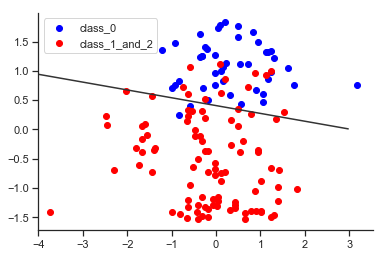

In [24]:
visualize_decision_boundary_2d(target_names=['class_0', 'class_1_and_2'], X=X_train, y=y_train, lr=lr)

## Step 8: Precision-recall tradeoff

Since Logistic Regression is able to predict probabilities naturally, we can theoretically change the default threshold (0.5) of separating postivie (1) vs. negative (0) classes.

Let's see how changing this threshold affect our metrics.

The following code plots the relationship between **precision** and **recall** when the decision threshold is changed. What pattern can you observe from the plot?

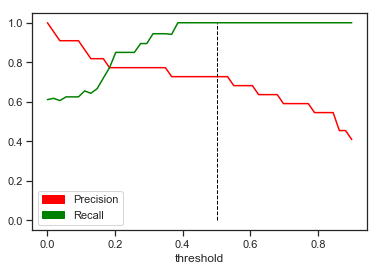

In [25]:
from sklearn.metrics.classification import precision_score, recall_score
import matplotlib.patches as mpatches

thresholds = np.linspace(0, 0.9) # evenly 10 spaced numbers over [0, 0.9].
classes = lr.classes_
test_probs = lr.predict_proba(X_test)
pos_idx = list(classes).index(1)  # find the class index representing the positive class `1`

precisions = []
recalls = []
for threshold in thresholds:
    
    pos_j = np.where(test_probs[:,pos_idx] >= threshold) # the index in the test set whose prediction is above the threshold
    y_preds = np.zeros(len(y_test))
    y_preds[pos_j[0]] = 1

    precisions.append(precision_score(y_preds, y_test))
    recalls.append(recall_score(y_preds, y_test))

plt.plot(thresholds, precisions, c='r') # the precision curve
plt.plot(thresholds, recalls, c='g') # the recall curve

y = np.linspace(0, 1, 100)
plt.plot([0.5]*len(y), y, linestyle='--', linewidth=1, c='k') # the default threshold 0.5

plt.xlabel('threshold')
prec_patch = mpatches.Patch(color='red', label='Precision')
rec_patch = mpatches.Patch(color='green', label='Recall')
plt.legend(handles=[prec_patch, rec_patch])

> **Recall**: among all the truly Yes cases, how many of them are predicted by us.

> **Precision:** among all the predicted Yes cases, how many of them truly Yes.